In [1]:
#準備
#neko.txtを取得
!wget https://nlp100.github.io/data/neko.txt

--2021-05-11 05:42:02--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.07s   

2021-05-11 05:42:02 (12.7 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
#準備
#MeCabをインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ub

In [3]:
#準備
#形態素解析結果を出力する
#-oオプションでファイルの出力ができる
!mecab -o neko.txt.mecab neko.txt

In [4]:
#準備
#形態素解析結果のフォーマットの確認
!head -20 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*


In [5]:
#30. 形態素解析結果の読み込み
#MeCabの出力フォーマットは1語ずつ次のようになっている
#'表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音'
#一文の文末には'EOS(\n)'が表記される

#目的は、各形態素を指定のキーでマッピング型に格納し
#さらにそれを1文のリストとして表現すること

#つまり、まず1文中の「各語の形態素をマッピングしたもの」を要素とする1文分のリストを作成
morph_sentence = []
#そしてその「1文分のリスト」を要素とする'neko.txt'全体のリストを作成する必要がある
morph_text = []

#上で作成した形態素解析結果ファイルを開く
with open('neko.txt.mecab') as f:
  #for文で1行ずつ読み込んでいく
  for line in f:

    #読み込んだ行が文末でなければ、形態素をマッピング型に格納する
    if line != 'EOS\n':

      #まずsplit()メソッドを用いて'\t'で表層形とそれ以外の部分に分ける
      front = line.split('\t')
      #分けたときに2つに分かれたかどうかをlen()関数を用いて調べる
      if len(front) != 2:
        #分かれていなければcontinueでその行は無視して次の繰り返し処理へ移る
        continue

      else:
        #2つに分かれていれば後半部分を','で区切っていく
        back = front[1].split(',')

        #そして取得する表層形、基本形、品詞、品詞細分類1をそれぞれ対応する箇所から抽出する
        #抽出したものはマッピング型に格納
        morph_word = {'surface': front[0], 'base': back[6], 'pos': back[0], 'pos1': back[1]}
        #それを要素とするリスト(morph_sentence)にappend()メソッドで格納
        morph_sentence.append(morph_word)

    else:
      #読み込んだ行が文末であれば、その文のリストを、それを要素とする文全体のリストに格納
      morph_text.append(morph_sentence)
      #1文のリストは次の文のために初期化しておく
      morph_sentence = []

#獲得したうちの1文の形態素を表示する
for line in morph_text[2]:
  print(line)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}


In [6]:
#31. 動詞

#動詞には重複するものがあるのでset型（重複を削除できる）に格納する
verb_surface = set()

#二重for文を用い30で作成したmorph_textに格納した各語の形態素マッピングを取得
for sentence in morph_text:
  for word in sentence:

    #その語のキー'pos（品詞）'の値が動詞であるかどうかを判別
    if word['pos'] == '動詞':
      #動詞であれば、その語のキー'surface'の値を作成ておいたset型に格納する
      verb_surface.add(word['surface'])

#表示
#取得した動詞をすべて表示するとかなりの行になってしまう
#そのためここでは一部だけを表示する(最初の10件)
#そのためにset型をlist型に直し、スライスを用いて表示する範囲を指定する
tmp_list = list(verb_surface)
for line in tmp_list[:10]:
  print(line)

終
おけ
取り留め
しでかす
強い
見よ
書こ
律する
泣き
ぶ


In [7]:
#32. 動詞の基本形

#やることは31とほぼ同じである
#取得するものがキー'surface'の値からキー'base'の値に変わっただけである

verb_base = set()
for sentence in morph_text:
  for word in sentence:
    if word['pos'] == '動詞':
      #動詞であれば、その語のキー'base'の値を作成ておいたset型に格納する
      verb_base.add(word['base'])

#表示(10件分)
tmp_list = list(verb_base)
for line in tmp_list[:10]:
  print(line)

煙る
融ける
しでかす
律する
図る
揃える
聞きつける
差出す
つくろう
挟まる


In [8]:
#33. 「AのB」
#やることは31,32とは少し異なる

#重複するものを削除するためのset型
a_no_b = set()

#語の形態素のリストを1文ずつ取得する
for sentence in morph_text:

  #1文の中で'名詞の名詞'という形を持つものを探す
  #i番目の品詞が名詞、i+1番目の表層形が'の'、i+2番目の品詞が名詞となる場合を探す
  #そのため範囲は（1文中の語の数－2）となる
  for i in range(len(sentence)-2):
    if sentence[i]['pos'] == '名詞' and sentence[i+1]['surface'] == 'の' and sentence[i+2]['pos'] == '名詞':

      #見つかれば、それらの表層形を足し合わせ、事前に作成したset型に格納する
      a_no_b.add(sentence[i]['surface'] + sentence[i+1]['surface'] + sentence[i+2]['surface'])

#表示(10件分)
tmp_list = list(a_no_b)
for line in tmp_list[:10]:
  print(line)

僕の失恋
甕の中
新年の御慶
時代の朋友
人間の名前
上の参考
一の条件
不振の際
Agnodiceの逸話
骨の左右


In [9]:
#34. 名詞の連接

#重複するものを削除するためのset型
noun_combine = set()


#まず、同じく語の形態素のリストを1文ずつ取得する
for sentence in morph_text:
  #連接の名詞を得るための変数
  noun = ''
  #連接した名詞の数を数えるための変数
  noun_count = 0

  #31の時と同じく1語ずつ見ていく
  for word in sentence:

    #その語のキー'pos'の値が名詞であるかどうかを判別
    if word['pos'] == '名詞':

      #その語の表層形をnounに足し合わせる
      noun = noun + word['surface']
      #足し合わせた分、回数を1つ増やす
      noun_count += 1

    else:
      #キー'pos'の値が名詞でなかった場合
      #さらにnoun_countが2以上であるかどうか判別
      #noun_countが1ならばそれは連接していない(0はそもそも名詞が見つかっていない)
      if noun_count >= 2:
        #noun_countが2以上ならばそれが名詞の連接の最長一致であるので、set型に格納
        noun_combine.add(noun)
      
      #次の探索に移行する前にnounとnoun_countは初期化しておく
      noun = ''
      noun_count = 0

#表示(10件分)
tmp_list = list(noun_combine)
for line in tmp_list[:10]:
  print(line)

曾呂崎
禅坊主
鴛鴦歌
神経胃弱性
奥さん意地張り
泥棒陰士
蛸壺峠
五杯目
住人多々良三平君
宮殿下


In [10]:
#35. 単語の出現頻度

#単語の出現頻度をカウントするため、collectionsのCounterを導入する
from collections import Counter

#重複を削除しないようリスト型を用意（出現頻度をカウントするため）
word_list = []
#今までと同じく二重for文
for sentence in morph_text:
  for word in sentence:
    #求めるのは単語であるので、キー'pos'の値が'記号'ではない場合を選択
    if word['pos'] != '記号':
      #表層形が異っても同じ単語の場合があるので、キーは'base'を選択
      word_list.append(word['base'])

#collections.Counter()にリストなどを渡すとCounterオブジェクトが生成される
#Counterは辞書型dictのサブクラスで、キーに要素、値に出現回数という形のデータ
#辞書型のメソッドも使えるが、ここではCounterのmost_common()メソッドを使用
#most_common()メソッドは(要素, 出現回数)という形のタプルを出現回数順に並べたリストを返す
word_count = Counter(word_list).most_common()

#表示(10件分)
for line in word_count[:10]:
  print(line)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


In [11]:
#準備
#36からはmatplotlibを使用するが、matplotlibで日本語を表示させるため
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 4.3MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=8af536460507f26ec03245be0e609684b3a9c01947186a4e2bd4f023e874de5a
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


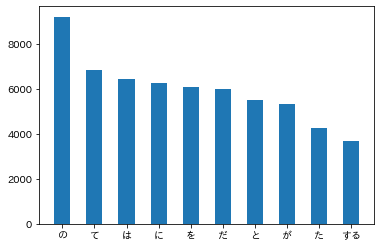

In [12]:
#36. 頻度上位10語
#matplotlibと日本語対応のモジュールをインポートする
import matplotlib.pyplot as plt
import japanize_matplotlib

#グラフで使用するために上位10語とその出現頻度をそれぞれリストに格納する
word_ten = []
frequency = []
#上位10語を求めるのは35で作成したword_countを再利用する
for line in word_count[:10]:
  word_ten.append(line[0])
  frequency.append(line[1])

#matplotlibのbar()メソッドで棒グラフが作成できる
#1つ目の引数がx軸、2つ目がy軸、widthで棒の幅を指定できる
plt.bar(word_ten, frequency, width=0.5)
#show()メソッドで作成したグラフを表示
plt.show()

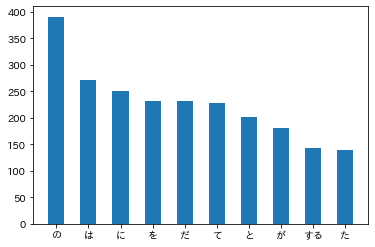

In [13]:
#37. 「猫」と共起頻度の高い上位10語
#共起範囲を「猫」が出現する1文中とする

#「猫」と共起する語を格納するリスト
cat_list = []
#今までと同じく二重for文
for sentence in morph_text:
  #各単語のキー'base'の値を要素とするリストを作成
  #共起範囲を1文としているので、1文ごとに初期化する
  tmp = []
  for word in sentence:
    #求めるのは単語であるので、キー'pos'の値が'記号'ではない場合を選択
    if word['pos'] != '記号':
      #上で作成したリストにキー'base'の値を格納
      tmp.append(word['base'])

  #格納したリスト中に「猫」が出現していた場合そのリストをcat_listに格納する（共起）
  #extend()メソッドではリストやタプルを結合できる
  if '猫' in tmp:
    cat_list.extend(tmp)

#共起頻度の高いものは35と同じくCounterとmost_common()メソッドを用いて求める

#ただし「猫」という単語の出現回数はカウントしないようにする
#そこで一度辞書型に格納し、pop()メソッドを用いて「猫」の要素を削除する
#（タプルのリスト型のまま「猫」の要素を削除する方法がわからなかったため）
tmp_dict = dict(Counter(cat_list).most_common())
tmp_dict.pop('猫')

#グラフに表示するためitems()メソッドでキーと値を取り出し、タプルのリスト型に再度直す
#辞書型で先頭から10件目までを取り出すという方法がわからなかったため
cat_count = list(tmp_dict.items()) 

#グラフへの表示は36と同じ手順
cat_ten = []
cat_frequency = []
for line in cat_count[:10]:
  cat_ten.append(line[0])
  cat_frequency.append(line[1])

plt.bar(cat_ten, cat_frequency, width=0.5)
plt.show()

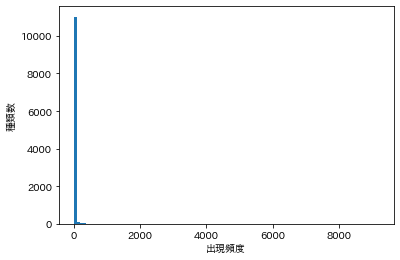

In [14]:
#38. ヒストグラム
#単語の出現頻度は35で求めたword_countを用いる
#出現頻度だけを取り出したいので、辞書型に直す
word_dict = dict(word_count)

#hist()メソッドを用いるとヒストグラムが描ける
#1つ目の引数がx軸の値（出現頻度）、binsでヒストグラムのビンの数を選択できる
plt.hist(word_dict.values(), bins=100)
#label()メソッドでx軸、y軸のラベルを設定
plt.xlabel('出現頻度')
plt.ylabel('種類数')
#グラフの表示
plt.show()

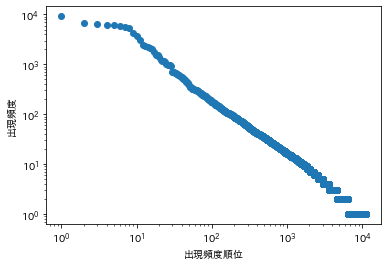

In [15]:
#39. Zipfの法則
#単語の出現頻度は同じくword_countを用いる
#リストはそれぞれ出現頻度順位と出現頻度を格納する
word_rank = []
word_frequency = []
#出現頻度順位のための変数
rank = 1
#word_countを1行（1語）ずつ読み込む
for line in word_count:
  #その語の出現頻度順位と出現頻度をそれぞれ格納する
  word_rank.append(rank)
  word_frequency.append(line[1])

  #rankを1増やしておく
  rank += 1

#グラフは散布図でプロットするのでscatter()メソッドを用いる
plt.scatter(word_rank, word_frequency)
#x,yscale()メソッドを用いてグラフを両対数グラフにする
plt.xscale('log')
plt.yscale('log')
#x軸、y軸のラベルはそれぞれ出現頻度順位、出現頻度
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()